# Introduction

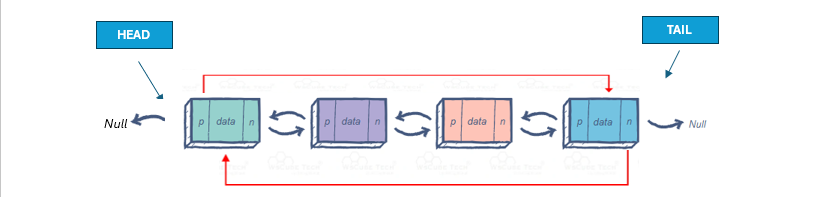

A **double circular linked list** (or **Circular Doubly Linked List, CDLL**) is a data structure where each node contains:
* the `data`.
* a pointer to the next node called `next`.
* a pointer to the previous node called `prev`.

**Head** and **Tail**: 
* The first node in the list is called the `head`, and its `prev` pointer points to the last node pointed by `tail`.
* The last node is the `tail`, and its `next` pointer points to the first node pointed by`head`. 

This structure allows for efficient bidirectional traversal and continuous cycling through the list, making it useful for applications like music playlists, browser history, and task schedulers.  

**How it Works**
* **Bidirectional Traversal**: Because each node has both `next` and `prev` pointers, you can move forward or backward through the list. 
* **Continuous Loop**: The circular arrangement means you can start at any node, traverse the entire list, and eventually return to your starting point without hitting a `NULL` pointer. 
* **No `NULL` End**: The absence of `NULL` pointers in the first and last nodes is a defining characteristic, with the pointers creating a complete circle. 

**Common Applications**
* **Media Player Playlists**: Users can easily navigate between songs and repeat the entire playlist.
* **Browser History**: Allows for straightforward navigation back and forth between visited web pages.
* **Undo/Redo Functionality**: Used in applications to implement the ability to undo or redo previous actions.
* **Operating System Task Scheduling**: Used to cycle through tasks, allowing the system to execute them in an ongoing sequence.

# Circular Doubly Linked List implementation

In [37]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        self.prev = None

    def __str__(self):
        return str(self.data)


class CircularDoublyLinkedList:

    # Creation of a Circular Doubly Linked List with zero nodes
    def __init__(self):
        # Empty Circular Doubly Linked List
        self.head = None
        self.tail = None
        self.length = 0

    def __str__(self):
        result = ''
        current_node = self.head
        while current_node:
            result += str(current_node.data)
            current_node = current_node.next
            if current_node == self.head: break # Stop condition for circular list
            result += ' <-> '
        return result

    # Insertion at the end of the Circular Doubly Linked List
    def append(self, value):
        new_node = Node(value)
        # add node in an empty Circular Doubly Linked list
        if self.length == 0: # if self.head == None (equivalent to - if not self.head)
            self.head = new_node
            self.tail = new_node
            self.head.prev = new_node
            self.tail.next = new_node
        # insert at the end of the circular doubly linked list
        else:
            self.tail.next = new_node
            new_node.prev = self.tail
            self.head.prev = new_node
            new_node.next = self.head
            self.tail = new_node
        self.length += 1

    # Insertion at the beginning of the Circular Doubly linked list
    def prepend(self, value):
        new_node = Node(value)
        # add node in an empty Circular Doubly linked list
        if self.length == 0: # if self.head == None (equivalent to - if not self.head)
            self.head = new_node
            self.tail = new_node
            self.head.prev = new_node
            self.tail.next = new_node
        # insert at the beginning of the circular doubly linked list
        else:
            new_node.next = self.head
            self.head.prev = new_node
            self.tail.next = new_node
            new_node.prev = self.tail
            self.head = new_node
        self.length += 1

    # Insertion in the middle of the circular doubly linked list
    def insert(self, index, value):
        # Check for out of range
        if index < -1 or index > self.length:
            print("Error: Index out of bounds.")
            return

        new_node = Node(value)

        # add node in an empty Circular Doubly linked list
        if self.length == 0:  # if self.head == None (equivalent to - if not self.head)
            self.head = new_node
            self.tail = new_node
            self.head.prev = new_node
            self.tail.next = new_node
            self.length += 1
        # insert at the beginning
        elif index == 0:
            new_node.next = self.head
            self.head.prev = new_node
            self.tail.next = new_node
            new_node.prev = self.tail
            self.head = new_node
            self.length += 1
        # insert at the end
        elif index == self.length or index == -1:
            self.tail.next = new_node
            new_node.prev = self.tail
            self.head.prev = new_node
            new_node.next = self.head
            self.tail = new_node
            self.length += 1
        # insert in the middle
        else:
            temp_node = self.head
            # Traverse to the previous node of the index node
            for _ in range(index - 1):
                temp_node = temp_node.next
            new_node.next = temp_node.next
            new_node.prev = temp_node
            temp_node.next.prev = new_node
            temp_node.next = new_node
            self.length += 1

    # Circular Doubly Linked List traversal
    def traverse(self):
        current_node = self.head
        while current_node:
            print(current_node.data)
            current_node = current_node.next
            if current_node == self.head: # Stop condition for circular list
                break

    # Circular Doubly Linked List reverse traversal
    def reverse_traverse(self):
        current_node = self.tail
        while current_node:
            print(current_node.data)
            current_node = current_node.prev
            if current_node == self.tail: # Stop condition for circular list
                break

    # Search node in a circular doubly linked list
    def search(self, target):
        current_node = self.head
        while current_node:
            if current_node.data == target:
                return True
            current_node = current_node.next
            if current_node == self.head: # Stop condition for circular list
                break
        return False

    # Get node of a Circular Doubly linked list
    def get(self, index):
        if index < 0 or index >= self.length:
            return None

        current_node = None
        if index < self.length // 2:
            current_node = self.head
            for i in range(index):
                current_node = current_node.next
        else:
            current_node = self.tail
            for i in range(self.length - 1, index, -1):
                current_node = current_node.prev

        return current_node

    # Set value of a node of circular doubly linked list
    def set_value(self, index, value):
        temp = self.get(index)
        if temp:
            temp.data = value
            return True
        return False

    # Pop first node of a circular doubly linked list
    def pop_first(self):
        # pop_first in an empty Circular Doubly Linked List
        if self.length == 0:
            return None

        popped_node = self.head
        # pop_first in a Circular Doubly Linked List having only one node
        if self.length == 1:
            self.head = None
            self.tail = None
            popped_node.prev = None
            popped_node.next = None
        # pop_first in a Circular Doubly Linked List having more than one node
        else:
            self.head = self.head.next
            self.head.prev = self.tail
            self.tail.next = self.head
            popped_node.next = None
            popped_node.prev = None

        self.length -= 1
        return popped_node

    # Pop last node of a Circular Doubly linked list
    def pop(self):
        # pop in an empty Circular Doubly Linked List
        if self.length == 0:
            return None

        popped_node = self.tail
        # pop in a Circular Doubly Linked List having only one node
        if self.length == 1:
            self.head = None
            self.tail = None
            popped_node.next = None
            popped_node.prev = None
        # pop in a Circular Doubly Linked List having more than one node
        else:
            self.tail = self.tail.prev # Updating the tail to be the second last node
            self.tail.next = self.head
            self.head.prev = self.tail
            popped_node.prev = None
            popped_node.next = None

        self.length -= 1
        return popped_node


# Creation of Circular Doubly Linked List

**Creation of an Empty Circular Doubly Linked List with zero nodes**

```python
class CircularDoublyLinkedList:

    # Creation of a Circular Doubly Linked List with zero nodes
    def __init__(self):
        # Empty Circular Doubly Linked List
        self.head = None
        self.tail = None
        self.length = 0
```

**Creation of a Circular Doubly Linked List with a single node**

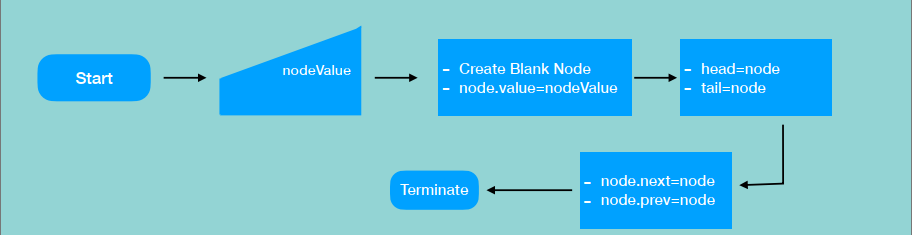

```python
class CircularDoublyLinkedList:

    # Creation of a Circular Doubly Linked List with zero nodes
    def __init__(self, data):
        new_node = Node(data)
        new_node.next = new_node
        new_node.prev = new_node

        self.head = new_node
        self.tail = new_node
        self.length = 1
```

# Insertion in Circular Doubly Linked List

1. Insert a new node at the end of the circular doubly linked list - `append()` operation
2. Insert a new node at the beginning of the circular doubly linked list - `prepend()` operation
3. Insert at a specified index of a circular doubly linked list - `insert()` operation

## Insert a new node at the end of the circular doubly linked list - `append()` operation

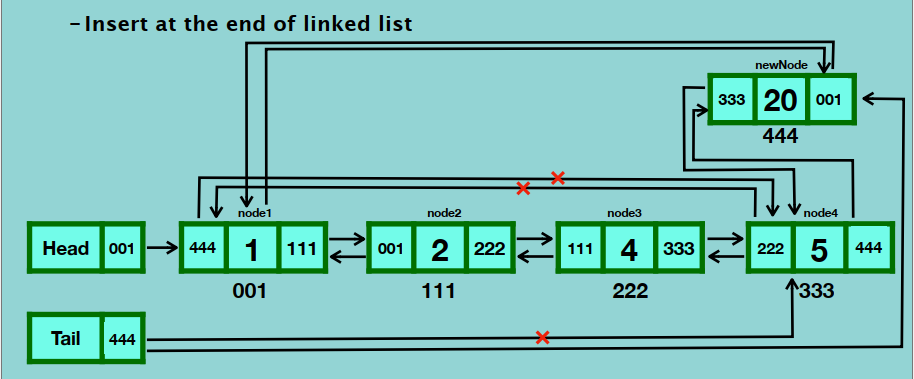

**Case 1: append in an empty Circular Doubly Linked List**
* Create a **new_node**.
* Set `head` to point to the **new_node**.
* Set `tail` to point to the **new_node**.
* Set `head.prev` to point to the **new_node**.
* Set `tail.next` to point to the **new_node**.
* Increase the circular doubly linked list length by 1.

```
new_node = Node(3)
head = new_node
tail = new_node
head.prev = new_node
tail.prev = new_node
circular_doubly_linked_list_length = circular_doubly_linked_list_length + 1
```

**Case 2: append in a Circular Doubly Linked List having one or more nodes**
* Create a **new_node**.
* Set `next` pointer of the **last_node** pointed by `tail` to point to the **new_node**.
* Set `prev` pointer of the **new_node** to point to the **last_node** pointed by `tail`.
* Set `prev` pointer of the **first node** pointed by `head` to point to the **new_node**.
* Set `next` pointer of the **new_node** to point to the **first node** pointed by `head`.
* Set `tail` to point to the **new_node**.
* Increase the circular doubly linked list length by 1.

```
new_node = Node(3)
tail.next = new_node
new_node.prev = tail
head.prev = new_node
new_node.next = head
tail = new_node
circular_doubly_linked_list_length = circular_doubly_linked_list_length + 1
```

**Implementation**

```python
# Insertion at the end of the Circular Doubly Linked List
    def append(self, value):
        new_node = Node(value)
        # add node in an empty Circular Doubly Linked list
        if self.length == 0: # if self.head == None OR if not self.head
            self.head = new_node
            self.tail = new_node
            self.head.prev = new_node
            self.tail.next = new_node
        # insert at the end of the circular doubly linked list
        else:
            self.tail.next = new_node
            new_node.prev = self.tail
            self.head.prev = new_node
            new_node.next = self.head
            self.tail = new_node
        self.length += 1
```

In [22]:
# Create Circular Doubly Linked List: 10 > 20 > 30 > 40 
circular_doubly_linked_list = CircularDoublyLinkedList()
circular_doubly_linked_list.append(10)
circular_doubly_linked_list.append(20)
circular_doubly_linked_list.append(30)
circular_doubly_linked_list.append(40)

print("Circular Doubly Linked List: ", circular_doubly_linked_list)

# Insert a new node at the end of the linked list with a node having a value of 50
circular_doubly_linked_list.append(50)

print("Last node value: ", circular_doubly_linked_list.tail.data)
print("Length of the linked list: ", circular_doubly_linked_list.length)
print("Linked List after append: ", circular_doubly_linked_list)

Circular Doubly Linked List:  10 <-> 20 <-> 30 <-> 40
Last node value:  50
Length of the linked list:  5
Linked List after append:  10 <-> 20 <-> 30 <-> 40 <-> 50


## Insert a new node at the beginning of the circular doubly linked list - `prepend()` operation

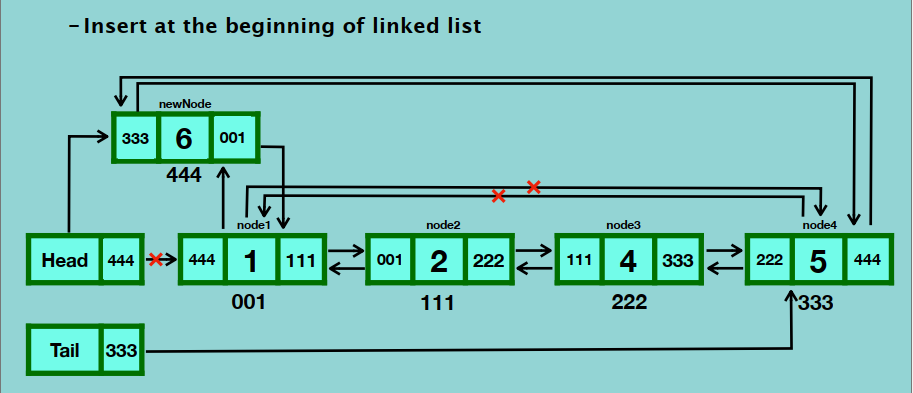

**Case 1: prepend in an empty Circular Doubly Linked List**
* Create a **new_node**.
* Set `head` to point to the **new_node**.
* Set `tail` to point to the **new_node**.
* Set `head.prev` to point to the **new_node**.
* Set `tail.next` to point to the **new_node**.
* Increase the circular doubly linked list length by 1.

```
new_node = Node(3)
head = new_node
tail = new_node
head.prev = new_node
tail.prev = new_node
circular_doubly_linked_list_length = circular_doubly_linked_list_length + 1
```

**Case 2: prepend in a Circular Doubly Linked List having one or more nodes**
* Create a **new_node**.
* Set the `next` pointer of the **new_node** to the **first node** (pointed by `head`) of the linked list.
* Set the `prev` pointer of the **first node** (pointed by `head`) to point to the **new_node**.
* Set the `next` pointer of the **last node** (pointed by `tail`) to the **new_node**.
* Set the `prev` pointer of the **new_node** to point to the **last node** pointed by `tail`.
* Set `head` pointer to point to the **new_node**.
* Increase the circular doubly linked list length by 1.

```
new_node = Node(0)
new_node.next = head
head.prev = new_node
tail.next = new_node
new_node.prev = tail
head = new_node
circular_doubly_linked_list_length = circular_doubly_linked_list_length + 1
```

**Implementation**

```python
# Insertion at the beginning of the Circular Doubly linked list
    def prepend(self, value):
        new_node = Node(value)
        # add node in an empty Circular Doubly linked list
        if self.length == 0: # if self.head == None (equivalent to - if not self.head)
            self.head = new_node
            self.tail = new_node
            self.head.prev = new_node
            self.tail.next = new_node
        # insert at the beginning of the circular doubly linked list
        else:
            new_node.next = self.head
            self.head.prev = new_node
            self.tail.next = new_node
            new_node.prev = self.tail
            self.head = new_node
        self.length += 1
```

In [23]:
# Create Circular Doubly Linked List: 10 > 20 > 30 > 40 
circular_doubly_linked_list = CircularDoublyLinkedList()
circular_doubly_linked_list.prepend(50)
circular_doubly_linked_list.prepend(40)
circular_doubly_linked_list.prepend(30)
circular_doubly_linked_list.prepend(20)

print("Doubly Linked List: ", circular_doubly_linked_list)

# Insert a new node at the beginning of the linked list with a node having a value of 50
circular_doubly_linked_list.prepend(10)

print("First node value: ", circular_doubly_linked_list.head.data)
print("Length of the linked list: ", circular_doubly_linked_list.length)
print("Linked List after prepend: ", circular_doubly_linked_list)

Doubly Linked List:  20 <-> 30 <-> 40 <-> 50
First node value:  10
Length of the linked list:  5
Linked List after prepend:  10 <-> 20 <-> 30 <-> 40 <-> 50


## Insert at a specified index of a circular doubly linked list - `insert()` operation

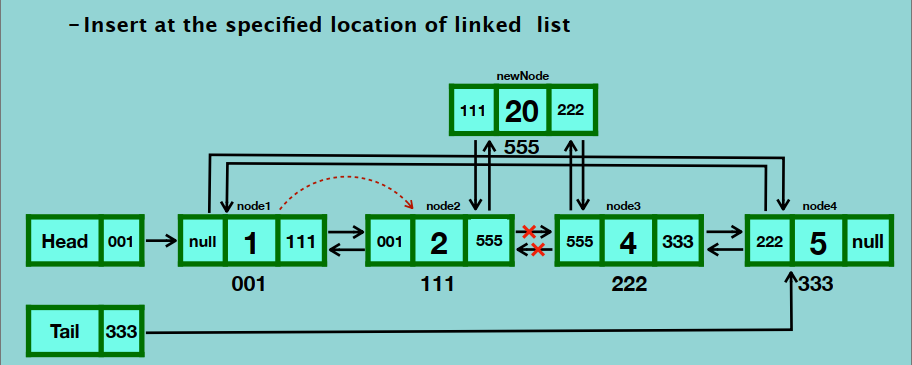

**Case 1: Insert in an empty Circular Doubly Linked List**
* Create a **new_node**.
* Set `head` to point to the **new_node**.
* Set `tail` to point to the **new_node**.
* Set `head.prev` to point to the **new_node**.
* Set `tail.next` to point to the **new_node**.
* Increase the circular doubly linked list length by 1.

```
new_node = Node(3)
head = new_node
tail = new_node
head.prev = new_node
tail.prev = new_node
circular_doubly_linked_list_length = circular_doubly_linked_list_length + 1
```

**Case 2: Insert at the beginning of a Circular Doubly Linked List having one or more nodes**
* Create a **new_node**.
* Set the `next` pointer of the **new_node** to the **first node** (pointed by `head`) of the linked list.
* Set the `prev` pointer of the **first node** (pointed by `head`) to point to the **new_node**.
* Set the `next` pointer of the **last node** (pointed by `tail`) to the **new_node**.
* Set the `prev` pointer of the **new_node** to point to the **last node** pointed by `tail`.
* Set `head` pointer to point to the **new_node**.
* Increase the circular doubly linked list length by 1.

```
new_node = Node(0)
new_node.next = head
head.prev = new_node
tail.next = new_node
new_node.prev = tail
head = new_node
circular_doubly_linked_list_length = circular_doubly_linked_list_length + 1
```


**Case 3: Insert at the end of a Circular Doubly Linked List having one or more nodes**
* Create a **new_node**.
* Set `next` pointer of the **last_node** pointed by `tail` to point to the **new_node**.
* Set `prev` pointer of the **new_node** to point to the **last_node** pointed by `tail`.
* Set `prev` pointer of the **first node** pointed by `head` to point to the **new_node**.
* Set `next` pointer of the **new_node** to point to the **first node** pointed by `head`.
* Set `tail` to point to the **new_node**.
* Increase the circular doubly linked list length by 1.

```
new_node = Node(3)
tail.next = new_node
new_node.prev = tail
head.prev = new_node
new_node.next = head
tail = new_node
circular_doubly_linked_list_length = circular_doubly_linked_list_length + 1
```

**Case 4: Insert at a specific index of a Circular Doubly Linked List having one or more nodes**
* Create a **new_node**.
* Traverse to the **previous node** pointing to the **index_node** where the **new_node** will be inserted.
* Set **temp_node** pointer to point the**previous node** of the **index_node**.
* Set the `next` pointer of the **new_node** to point to the node pointed by the `temp_node.next`.
* Set the `prev` pointer of the **index_node** (i.e., `temp_node.next.prev`) to point to the **new_node**.
* Now, set the `next` pointer of the **temp_node** to point to the **new_node**.
* Also, set the `prev` pointer of the **new_node** to point to the **temp_node**.
* Increase the circular doubly linked list length by 1.

```
new_node = Node(3)
temp_node = head

for _ in range(index-1):
    temp_node = temp_node.next

new_node.next = temp_node.next
new_node.prev = temp_node
temp_node.next.prev = new_node
temp_node.next = new_node

circular_doubly_linked_list_length = circular_doubly_linked_list_length + 1
```



**Implementation**

```python
    # Insertion in the middle of the circular doubly linked list
    def insert(self, index, value):
        # Check for out of range
        if index < -1 or index > self.length:
            print("Error: Index out of bounds.")
            return

        new_node = Node(value)

        # add node in an empty Circular Doubly linked list
        if self.length == 0:  # if self.head == None (equivalent to - if not self.head)
            self.head = new_node
            self.tail = new_node
            self.head.prev = new_node
            self.tail.next = new_node
            self.length += 1
        # insert at the beginning
        elif index == 0:
            new_node.next = self.head
            self.head.prev = new_node
            self.tail.next = new_node
            new_node.prev = self.tail
            self.head = new_node
            self.length += 1
        # insert at the end
        elif index == self.length or index == -1:
            self.tail.next = new_node
            new_node.prev = self.tail
            self.head.prev = new_node
            new_node.next = self.head
            self.tail = new_node
            self.length += 1
        # insert in the middle
        else:
            temp_node = self.head
            # Traverse to the previous node of the index node
            for _ in range(index - 1):
                temp_node = temp_node.next
            new_node.next = temp_node.next
            new_node.prev = temp_node
            temp_node.next.prev = new_node
            temp_node.next = new_node
            self.length += 1
```

In [24]:
# Create Circular Doubly Linked List: 10 > 20 > 30 > 40 
circular_doubly_linked_list = CircularDoublyLinkedList()
circular_doubly_linked_list.append(10)
circular_doubly_linked_list.append(20)
circular_doubly_linked_list.append(30)
circular_doubly_linked_list.append(40)

print("Circular Doubly Linked List before insertions: ", circular_doubly_linked_list)

# Insert a new node at a specified index in a Circular Doubly linked list
print("Insert at the beginning of the Circular Doubly Linked List: ", str(circular_doubly_linked_list.insert(0, 50)))
print("Insert in the middle of the Circular Doubly Linked List: ", str(circular_doubly_linked_list.insert(2, 60)))
print("Insert at the end of the Circular Doubly Linked List: ", str(circular_doubly_linked_list.insert(circular_doubly_linked_list.length, 70)))

print("Length of the Circular Doubly Linked List: ", circular_doubly_linked_list.length)
print("Circular Doubly Linked List after insertions: ", circular_doubly_linked_list)

print() 

empty_circular_doubly_linked_list = CircularDoublyLinkedList()
print("Insert at Invalid Index of a Circular Doubly Linked List: ", str(empty_circular_doubly_linked_list.insert(1, 100)))
print("Insert in an empty Circular Doubly Linked List: ", str(empty_circular_doubly_linked_list.insert(0, 100)))
print("Circular Doubly Linked List after insertions: ", empty_circular_doubly_linked_list)

Circular Doubly Linked List before insertions:  10 <-> 20 <-> 30 <-> 40
Insert at the beginning of the Circular Doubly Linked List:  None
Insert in the middle of the Circular Doubly Linked List:  None
Insert at the end of the Circular Doubly Linked List:  None
Length of the Circular Doubly Linked List:  7
Circular Doubly Linked List after insertions:  50 <-> 10 <-> 60 <-> 20 <-> 30 <-> 40 <-> 70

Error: Index out of bounds.
Insert at Invalid Index of a Circular Doubly Linked List:  None
Insert in an empty Circular Doubly Linked List:  None
Circular Doubly Linked List after insertions:  100


# Circular Doubly linked list Insertion Algorithm

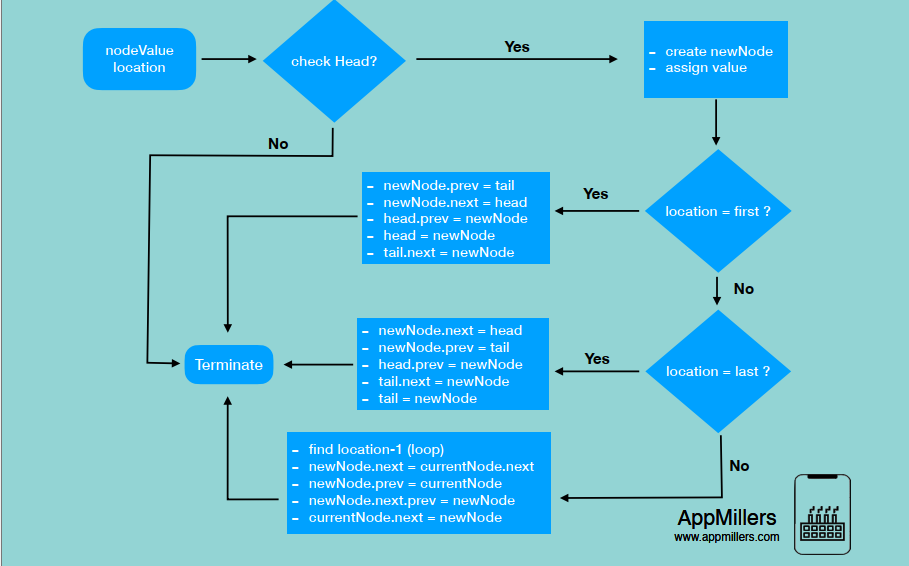

# Traversal of doubly linked list

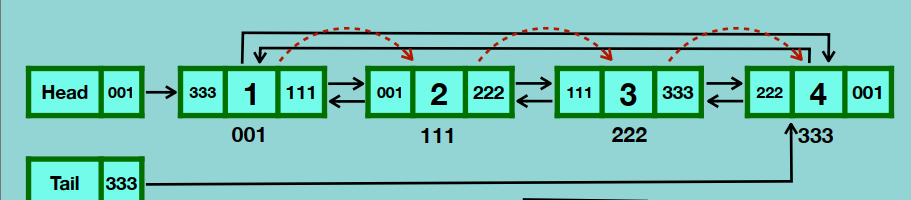

**Implementation**

```python
    # Circular Doubly Linked List traversal
    def traverse(self):
        current_node = self.head
        while current_node:
            print(current_node.data)
            current_node = current_node.next
            if current_node == self.head: # Stop condition for circular list
                break
```

In [27]:
# Create Circular Doubly Linked List: 10 > 20 > 30 > 40 
circular_doubly_linked_list = CircularDoublyLinkedList()

print("Empty Circular Doubly Linked List: ", circular_doubly_linked_list)
print("Traversing Circular Doubly Linked List Status: ", circular_doubly_linked_list.traverse())
print()

circular_doubly_linked_list.append(10)
circular_doubly_linked_list.append(20)
circular_doubly_linked_list.append(30)
circular_doubly_linked_list.append(40)

print("Circular Doubly Linked List after adding nodes: ", circular_doubly_linked_list)
print("Traversing Circular Doubly Linked List Status: ", circular_doubly_linked_list.traverse())

Empty Circular Doubly Linked List:  
Traversing Circular Doubly Linked List Status:  None

Circular Doubly Linked List after adding nodes:  10 <-> 20 <-> 30 <-> 40
10
20
30
40
Traversing Circular Doubly Linked List Status:  None


# Reverse Traversal in doubly linked list

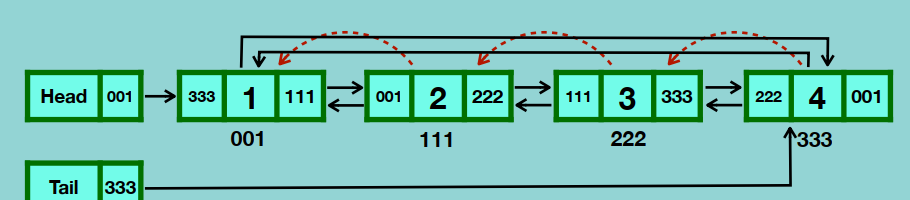

**Implementation**

```python
# Circular Doubly Linked List reverse traversal
    def reverse_traverse(self):
        current_node = self.tail
        while current_node:
            print(current_node.data)
            current_node = current_node.prev
            if current_node == self.tail: # Stop condition for circular list
                break
```

In [28]:
# Create Circular Doubly Linked List: 10 > 20 > 30 > 40 
circular_doubly_linked_list = CircularDoublyLinkedList()

print("Empty Circular Doubly Linked List: ", circular_doubly_linked_list)
print("Traversing Circular Doubly Linked List Status: ", circular_doubly_linked_list.reverse_traverse())
print()

circular_doubly_linked_list.append(10)
circular_doubly_linked_list.append(20)
circular_doubly_linked_list.append(30)
circular_doubly_linked_list.append(40)

print("Circular Doubly Linked List after adding nodes: ", circular_doubly_linked_list)
print("Traversing Circular Doubly Linked List Status: ", circular_doubly_linked_list.reverse_traverse())

Empty Circular Doubly Linked List:  
Traversing Circular Doubly Linked List Status:  None

Circular Doubly Linked List after adding nodes:  10 <-> 20 <-> 30 <-> 40
40
30
20
10
Traversing Circular Doubly Linked List Status:  None


# Searching in Doubly Linked List

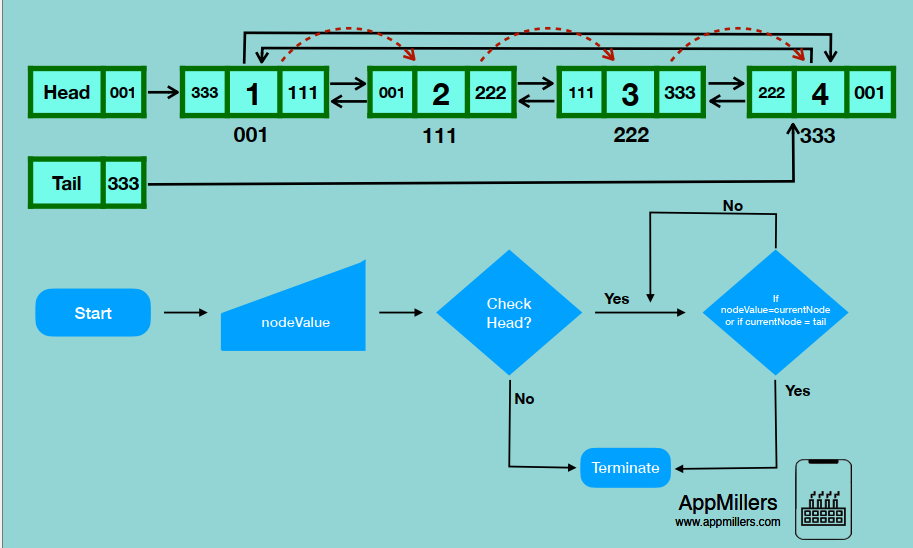

**Implementation**:

```python
    # Search node in a circular doubly linked list
    def search(self, target):
        current_node = self.head
        while current_node:
            if current_node.data == target:
                return True
            current_node = current_node.next
            if current_node == self.head: # Stop condition for circular list
                break
        return False
```

In [29]:
# Create Circular Doubly Linked List: 10 > 20 > 30 > 40 
circular_doubly_linked_list = CircularDoublyLinkedList()

print("Empty Circular Doubly Linked List: ", circular_doubly_linked_list)
print("Element found at index: ", circular_doubly_linked_list.search(30))
print()

circular_doubly_linked_list.append(10)
circular_doubly_linked_list.append(20)
circular_doubly_linked_list.append(30)
circular_doubly_linked_list.append(40)

print("Circular Doubly Linked List after adding nodes: ", circular_doubly_linked_list)

print("Element found at index: ", circular_doubly_linked_list.search(30))
print("Element found at index: ", circular_doubly_linked_list.search(50))

Empty Circular Doubly Linked List:  
Element found at index:  False

Circular Doubly Linked List after adding nodes:  10 <-> 20 <-> 30 <-> 40
Element found at index:  True
Element found at index:  False


# `get()` method - to get the node of a doubly linked list

**Implementation**

```python
    # Get node of a Circular Doubly linked list
    def get(self, index):
        if index < 0 or index >= self.length:
            return None

        current_node = None
        if index < self.length // 2:
            current_node = self.head
            for i in range(index):
                current_node = current_node.next
        else:
            current_node = self.tail
            for i in range(self.length - 1, index, -1):
                current_node = current_node.prev

        return current_node
```

In [33]:
# Create Circular Doubly Linked List: 10 > 20 > 30 > 40 
circular_doubly_linked_list = CircularDoublyLinkedList()
circular_doubly_linked_list.append(10)
circular_doubly_linked_list.append(20)
circular_doubly_linked_list.append(30)
circular_doubly_linked_list.append(40)

print("Circular Doubly Singly Linked List: ", circular_doubly_linked_list)
print("Last Node value: ", circular_doubly_linked_list.get(3).data)
print("Index 2 Node: ", circular_doubly_linked_list.get(2).data)

Circular Doubly Singly Linked List:  10 <-> 20 <-> 30 <-> 40
Last Node value:  40
Index 2 Node:  30


# `set_value()` method - to update a node value of doubly linked list

**Implementation**

```python
    # Set value of a node of circular doubly linked list
    def set_value(self, index, value):
        temp = self.get(index)
        if temp:
            temp.data = value
            return True
        return False
```

In [34]:
# Create Circular Doubly Linked List: 10 > 20 > 30 > 40 
circular_doubly_linked_list = CircularDoublyLinkedList()
circular_doubly_linked_list.append(10)
circular_doubly_linked_list.append(20)
circular_doubly_linked_list.append(30)
circular_doubly_linked_list.append(40)

print("Circular Doubly Linked List: ", circular_doubly_linked_list)

# set index 2 node value to 50
circular_doubly_linked_list.set_value(2, 50)

print("Circular Doubly Linked List: ", circular_doubly_linked_list)
print()

Circular Doubly Linked List:  10 <-> 20 <-> 30 <-> 40
Circular Doubly Linked List:  10 <-> 20 <-> 50 <-> 40



# Deletion in Circular Doubly Linked List

* Deleting the first node: `pop_first()` method
* Deleting the last node: `pop()` method
* Deleting any given node: `remove()` method
* Delete all nodes: `delete_all()` method

## Deleting the first node: `pop_first()` method

The `pop_first()` method removes & returns the first node of a circular doubly linked list.

**Case 1: `pop_first()` in an empty Circular Doubly Linked List**

No node to pop, hence return `None`.

**Case 2: `pop_first()` in a Circular Doubly Linked List having only one node**

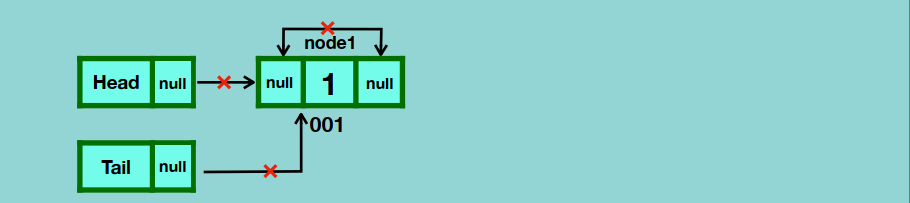

* Store the reference of **first node** (i.e., `head`) in `popped_node`.
* Set `head` to `None`.
* Set `tail` to `None`.
* Set the `prev` pointer of `popped_node` to `None`.
* Set the `next` pointer of `popped_node` to `None`.
* Decrease the circular doubly linked list length by 1.
* Return `popped_node`.

```
popped_node = head
head = None
tail = None
popped_node.prev = None
popped_node.next = None
circular_doubly_linked_list_length = circular_doubly_linked_list_length - 1
return popped_node
```

**Case 3: `pop_first()` in a Circular Doubly Linked List having more than one node**

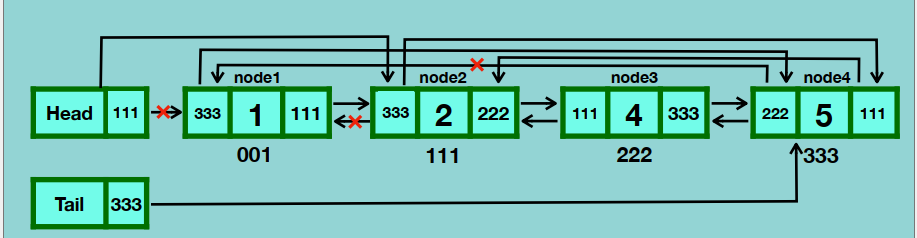

* Store the reference of **first node** (i.e., `head`) in `popped_node`.
* Set `head` to point to **second node** (i.e., `head.next`).
* Set the `prev` pointer of the **second node**(i.e., `head`) to point the **last node** (i.e., `tail`).
* Set the `next` pointer of the **last node** (i.e., `tail`) to point to the **second node**(i.e., `head`)
* Set the `prev` pointer of the **first node** (i.e., `popped_node`) to `None`.
* Set the `next` pointer of the **first node** (i.e., `popped_node`) to `None`.
* Decrease the circular doubly linked list length by 1.
* Return the **first node** (i.e., `popped_node`).

```
popped_node = head
head = head.next
head.prev = tail
tail.next = head
popped_node.prev = None
popped_node.next = None
circular_doubly_linked_list_length = circular_doubly_linked_list_length - 1
return popped_node
```

**Implementation**

```python
    # Pop first node of a circular doubly linked list
    def pop_first(self):
        # pop_first in an empty Circular Doubly Linked List
        if self.length == 0:
            return None

        popped_node = self.head
        # pop_first in a Circular Doubly Linked List having only one node
        if self.length == 1:
            self.head = None
            self.tail = None
            popped_node.prev = None
            popped_node.next = None
        # pop_first in a Circular Doubly Linked List having more than one node
        else:
            self.head = self.head.next
            self.head.prev = self.tail
            self.tail.next = self.head
            popped_node.next = None
            popped_node.prev = None

        self.length -= 1
        return popped_node
```


In [36]:
# Create Circular Doubly Linked List: 10 > 20 > 30 > 40 
circular_doubly_linked_list = CircularDoublyLinkedList()

print(circular_doubly_linked_list.pop_first())

# Create Linked List: 10 > 20 > 30 > 40 
circular_doubly_linked_list.append(10)
circular_doubly_linked_list.append(20)
circular_doubly_linked_list.append(30)
circular_doubly_linked_list.append(40)

print("Circular Doubly Linked List: ", circular_doubly_linked_list)

print("Node popped out has data = ", circular_doubly_linked_list.pop_first().data)
print("Circular Doubly Linked List: ", circular_doubly_linked_list)

None
Circular Doubly Linked List:  10 <-> 20 <-> 30 <-> 40
Node popped out has data =  10
Circular Doubly Linked List:  20 <-> 30 <-> 40


## Deleting the last node: `pop()` method

The `pop()` method removes & returns the last node of a circular doubly linked list.

**Case 1: `pop()` in an empty Circular Doubly Linked List**

No node to pop, hence return `None`.

**Case 2: `pop()` in a Circular Doubly Linked List having only one node**

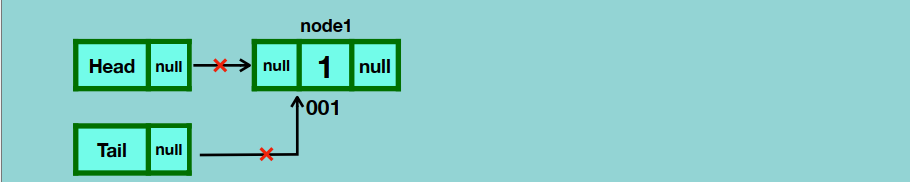

* Store the reference of **last node** (i.e., `tail`) in `popped_node`.
* Set `head` to `None`.
* Set `tail` to `None`.
* Set the `prev` pointer of `popped_node` to `None`.
* Set the `next` pointer of `popped_node` to `None`.
* Decrease the circular doubly linked list length by 1.
* Return `popped_node`.

```
popped_node = tail
head = None
tail = None
popped_node.prev = None
popped_node.next = None
circular_doubly_linked_list_length = circular_doubly_linked_list_length - 1
return popped_node
```

**Case 3: `pop()` in a Circular Doubly Linked List having more than one node**

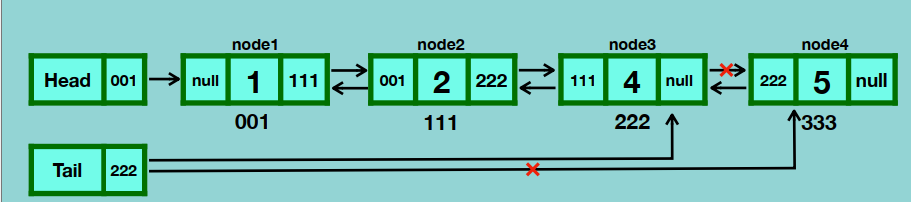

* Store the reference of **last node** (i.e., `tail`) in `popped_node`.
* Set `tail` to point to the **second last node** (i.e., `tail.prev`).
* Set `tail.next` to point to the **first node** (i.e., `head`).
* Set `head.prev` to point to the **last node** (i.e., `tail`).
* Set the `popped_node.prev` pointer to point to `None`.
* Set the `popped_node.next` pointer to point to `None`.
* Decrease the circular doubly linked list length by 1.
* Return popped_node

```
popped_node = tail
tail = tail.prev
tail.next = head
head.prev = tail
popped_node.prev = None
popped_node.next = None
circular_doubly_linked_list_length = circular_doubly_linked_list_length - 1
return popped_node
```

**Implementation**

```python
    # Pop last node of a Circular Doubly linked list
    def pop(self):
        # pop in an empty Circular Doubly Linked List
        if self.length == 0:
            return None

        popped_node = self.tail
        # pop in a Circular Doubly Linked List having only one node
        if self.length == 1:
            self.head = None
            self.tail = None
            popped_node.next = None
            popped_node.prev = None
        # pop in a Circular Doubly Linked List having more than one node
        else:
            self.tail = self.tail.prev # Updating the tail to be the second last node
            self.tail.next = self.head
            self.head.prev = self.tail
            popped_node.prev = None
            popped_node.next = None            

        self.length -= 1
        return popped_node
```

In [38]:
# Create Circular Doubly Linked List: 10 > 20 > 30 > 40 
circular_doubly_linked_list = CircularDoublyLinkedList()

print(circular_doubly_linked_list.pop())

# Create Linked List: 10 > 20 > 30 > 40 
circular_doubly_linked_list.append(10)
circular_doubly_linked_list.append(20)
circular_doubly_linked_list.append(30)
circular_doubly_linked_list.append(40)

print("Circular Doubly Linked List: ", circular_doubly_linked_list)

print("Node popped out has data = ", circular_doubly_linked_list.pop().data)
print("Circular Doubly Linked List: ", circular_doubly_linked_list)

None
Circular Doubly Linked List:  10 <-> 20 <-> 30 <-> 40
Node popped out has data =  40
Circular Doubly Linked List:  10 <-> 20 <-> 30
